<a href="https://colab.research.google.com/github/Harshavardhannadiveedi/DataScience/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load dataset
import pandas as pd
df=pd.read_csv("/content/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.shape#to know how many rows and columns

(101, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


**NO MISSING VALUES**

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
#no need for the animal name so drping it
df=df.drop('animal name',axis=1)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Text(0.5, 1.0, 'Count of Animals by Type')

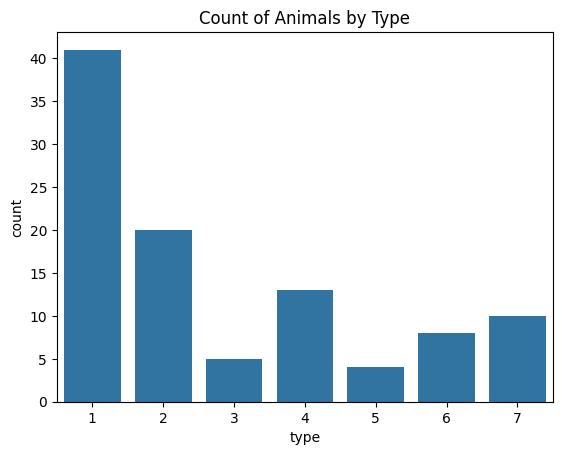

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='type')
plt.title("Count of Animals by Type")


In [10]:
df['type'].value_counts()

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


Text(0.5, 1.0, 'Milk vs Egg-Laying Correlation')

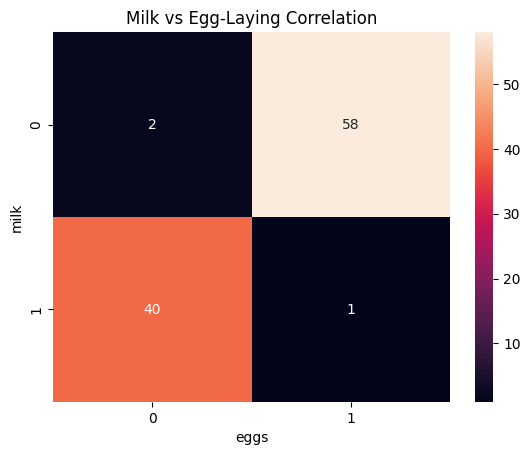

In [11]:
#Milk vs Egg Laying
sns.heatmap(pd.crosstab(df['milk'], df['eggs']), annot=True)
plt.title("Milk vs Egg-Laying Correlation")

<Axes: xlabel='type', ylabel='count'>

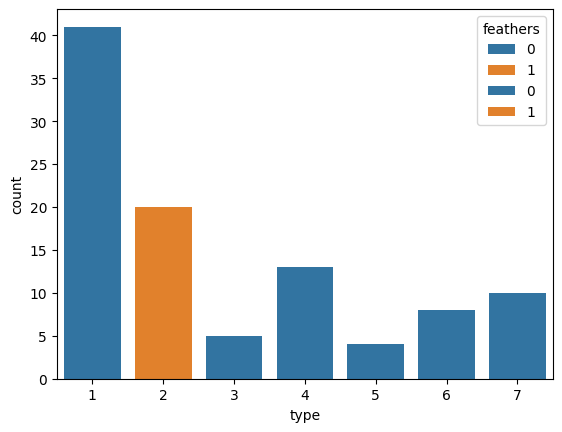

In [12]:
#Hair and Feathers by Type
sns.countplot(data=df, x='type', hue='hair')
sns.countplot(data=df, x='type', hue='feathers')

<Axes: xlabel='toothed', ylabel='predator'>

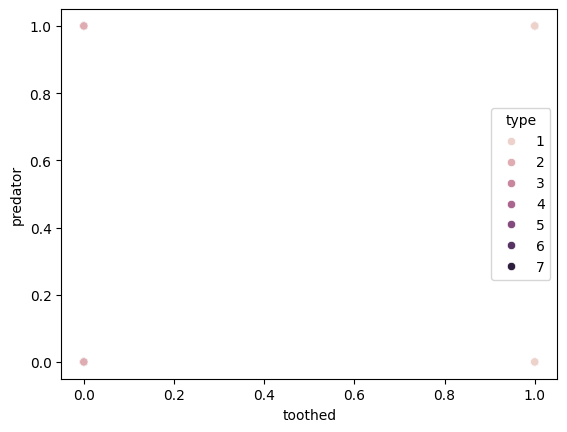

In [13]:
#Predator and Toothed Animals
sns.scatterplot(data=df, x='toothed', y='predator', hue='type')

<Axes: xlabel='aquatic', ylabel='airborne'>

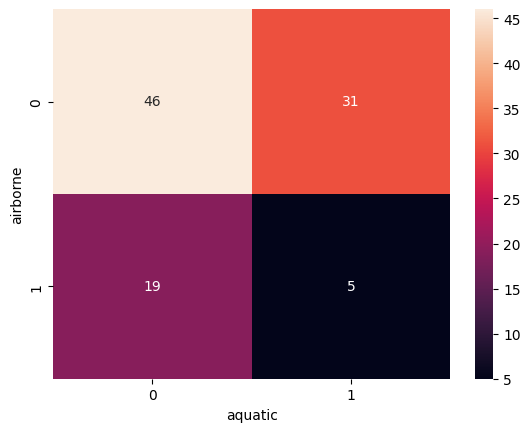

In [14]:
# Airborne vs Aquatic
sns.heatmap(pd.crosstab(df['airborne'], df['aquatic']), annot=True)

<Axes: xlabel='type', ylabel='legs'>

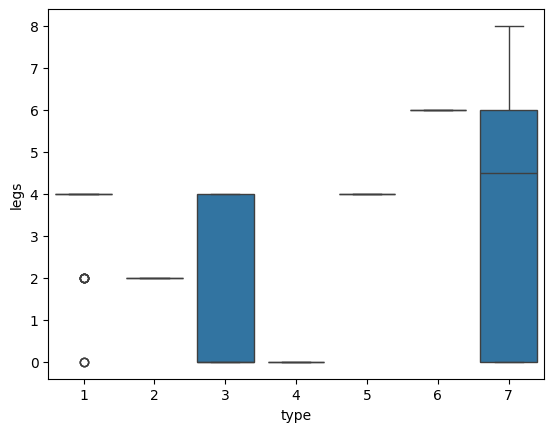

In [15]:
#Leg Count Distribution
sns.boxplot(data=df, x='type', y='legs')

<Axes: xlabel='domestic', ylabel='count'>

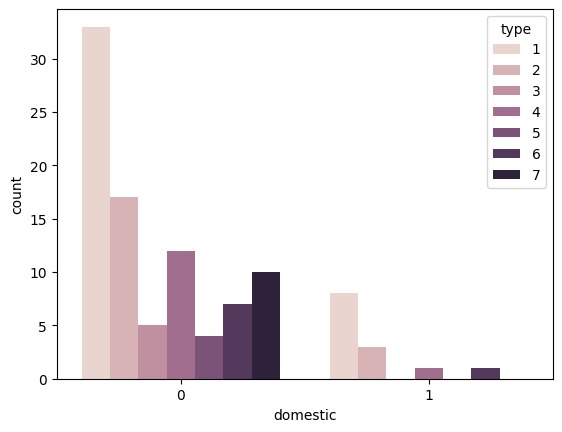

In [16]:
#Domestic vs Wild
sns.countplot(data=df, x='domestic', hue='type')

Text(0.5, 1.0, 'Count of Animals by Number of Legs')

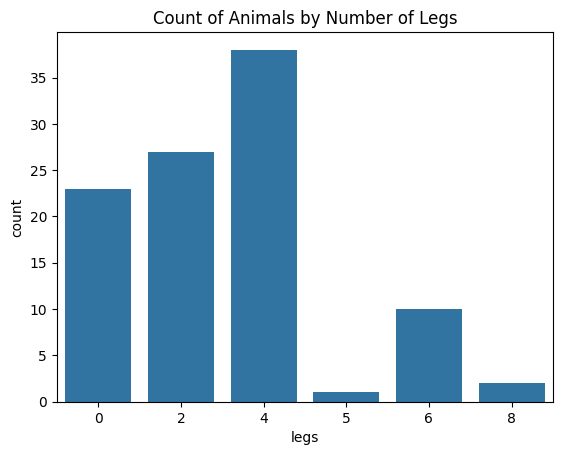

In [17]:
sns.countplot(data=df, x='legs')
plt.title("Count of Animals by Number of Legs")


In [20]:
df['legs'].value_counts()

,count
legs,
4,38
2,27
0,23
6,10
8,2
5,1


In [21]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


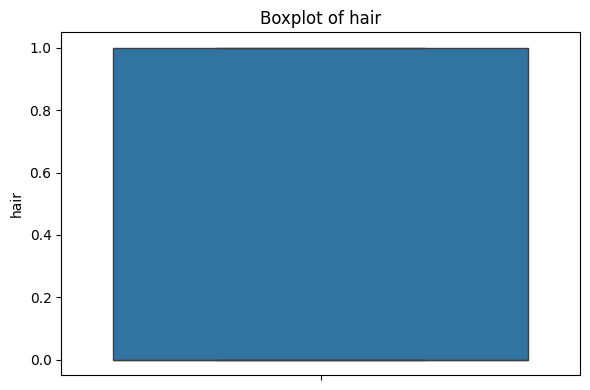

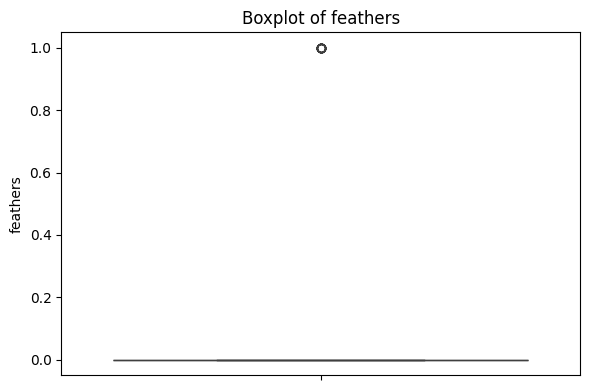

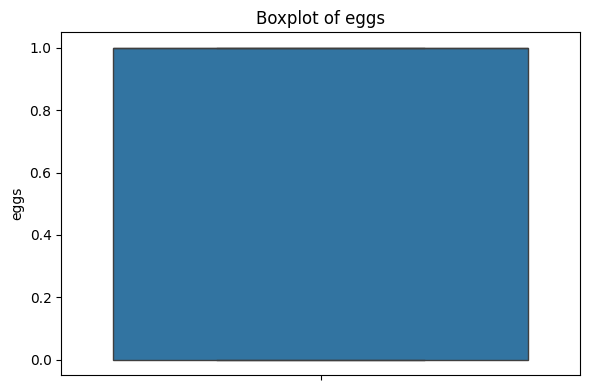

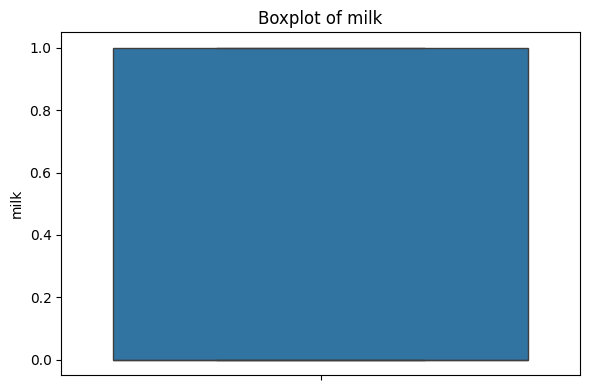

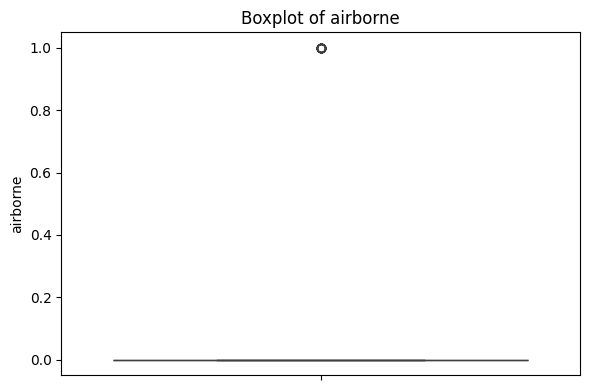

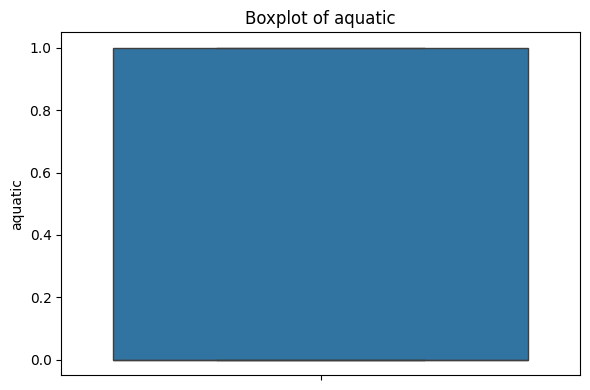

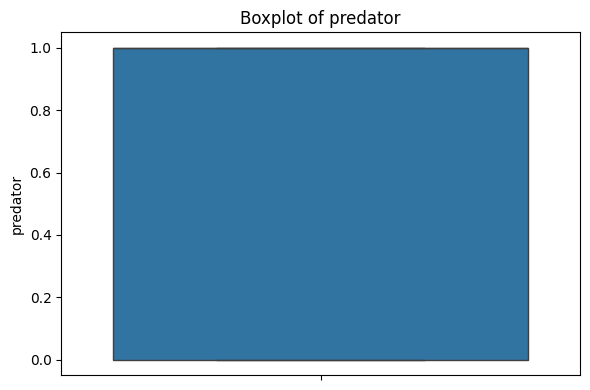

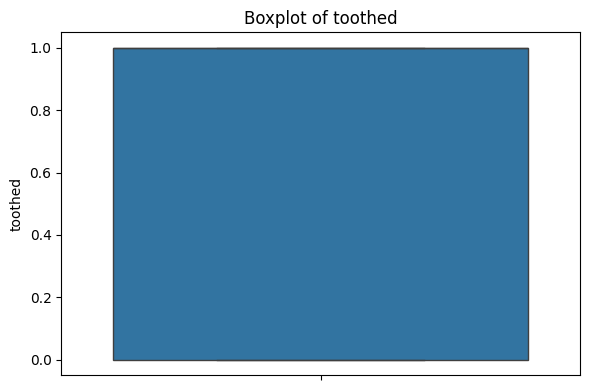

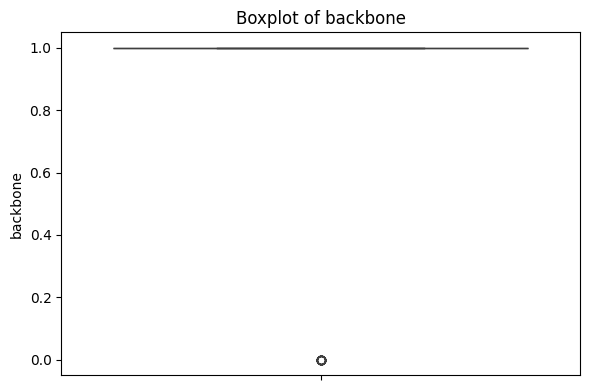

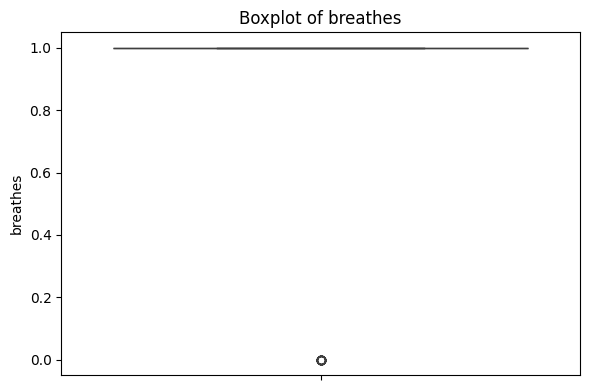

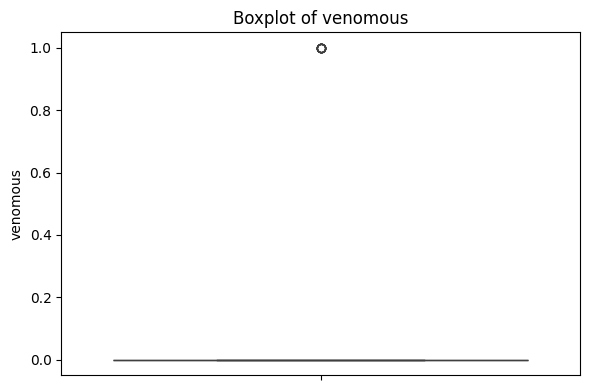

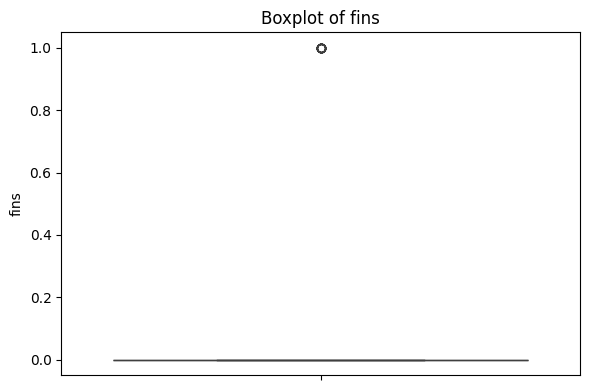

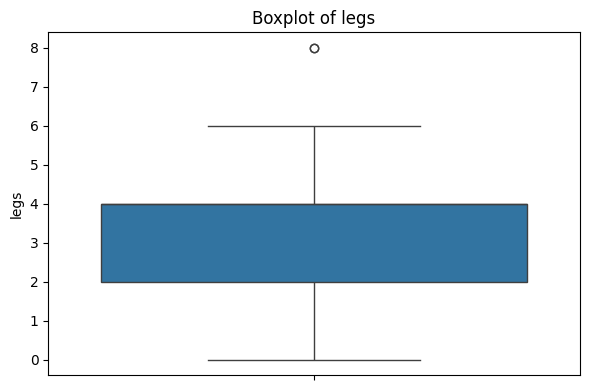

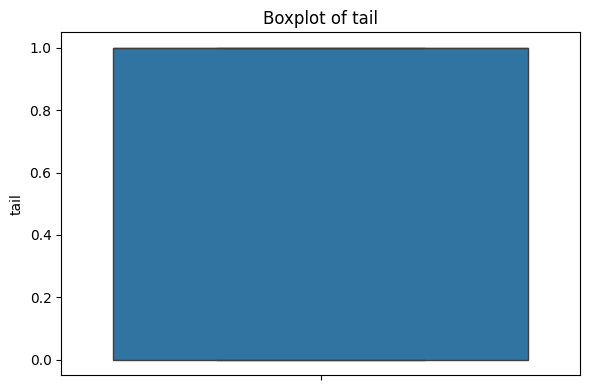

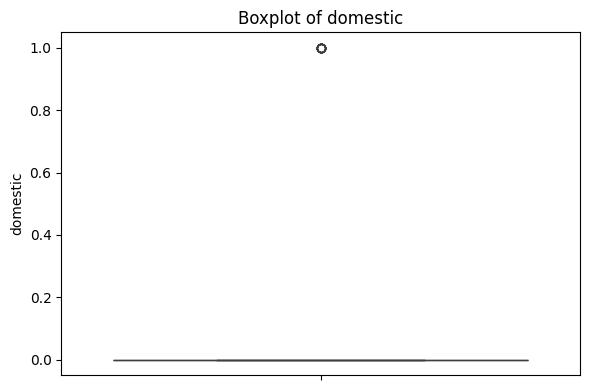

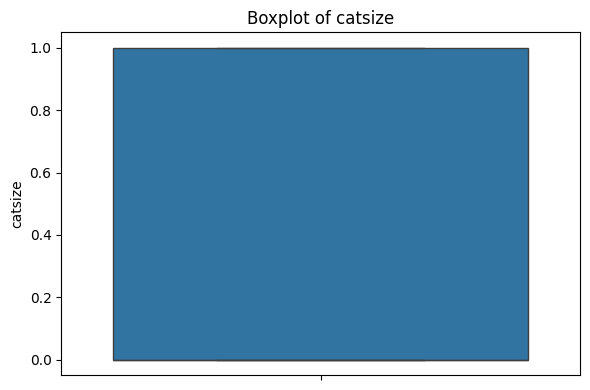

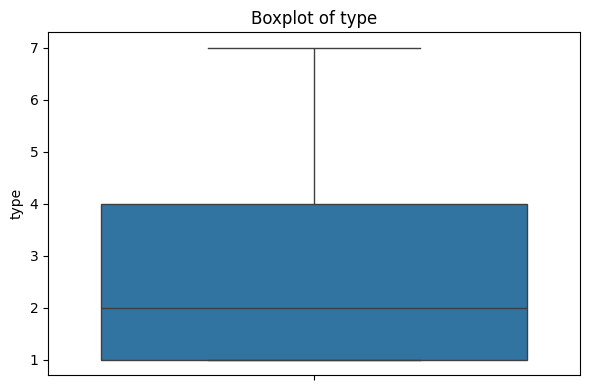

In [23]:
# Plot each boxplot separately
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [41]:
df=df.drop('legs',axis=1)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7


In [42]:
#Split the dataset into training and testing sets (80% training, 20% testing).
from sklearn.model_selection import train_test_split
X=df.drop('type',axis=1)
y=df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
#Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
from sklearn.neighbors import KNeighborsClassifier
k=5
model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)#no need to fill this method because the filled values are the default ones
model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
#Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [47]:
y_test.value_counts()

,count
type,
1,12
6,3
4,2
2,2
7,1
3,1


**Since there is  class 5 samples in y_test so it is not predicted by the model**

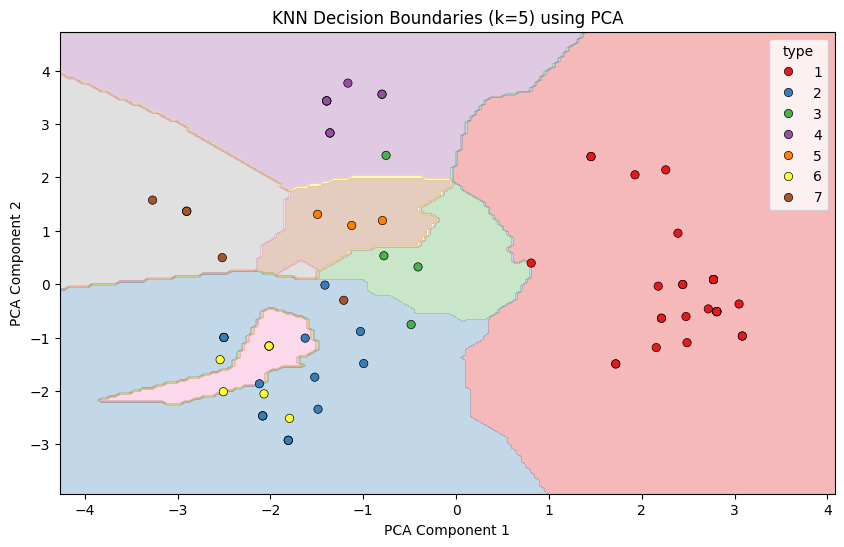

In [65]:
# Separate features and label
X = df.drop(columns=['type'])
y = df['type']
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
# Standardize features (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2 components with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split into train and test with stratified sampling to include all classes
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Train KNN on PCA-transformed data
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # Euclidean
knn.fit(X_train_pca, y_train)

# Create meshgrid for decision boundary plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict across the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='Set1', edgecolor='k')
plt.title(f"KNN Decision Boundaries (k={k}) using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



In [62]:
#printing accuracy with k_value
for k, acc in zip(k_values, accuracies):
    print(f"Accuracy for k={k}: {acc}")

Accuracy for k=1: 1.0
Accuracy for k=2: 1.0
Accuracy for k=3: 0.9523809523809523
Accuracy for k=4: 0.9523809523809523
Accuracy for k=5: 1.0
Accuracy for k=6: 1.0
Accuracy for k=7: 1.0
Accuracy for k=8: 1.0
Accuracy for k=9: 0.9523809523809523
Accuracy for k=10: 0.9523809523809523
Accuracy for k=11: 0.9523809523809523
Accuracy for k=12: 0.9047619047619048
Accuracy for k=13: 0.9047619047619048
Accuracy for k=14: 0.9047619047619048
Accuracy for k=15: 0.9047619047619048
Accuracy for k=16: 0.9047619047619048
Accuracy for k=17: 0.9047619047619048
Accuracy for k=18: 0.9047619047619048
Accuracy for k=19: 0.9047619047619048
Accuracy for k=20: 0.9047619047619048


In [63]:
#printing error with k_values
for k, err in zip(k_values, errors):
    print(f"Error Rate for k={k}: {err}")

Error Rate for k=1: 0.0
Error Rate for k=2: 0.0
Error Rate for k=3: 0.04761904761904767
Error Rate for k=4: 0.04761904761904767
Error Rate for k=5: 0.0
Error Rate for k=6: 0.0
Error Rate for k=7: 0.0
Error Rate for k=8: 0.0
Error Rate for k=9: 0.04761904761904767
Error Rate for k=10: 0.04761904761904767
Error Rate for k=11: 0.04761904761904767
Error Rate for k=12: 0.09523809523809523
Error Rate for k=13: 0.09523809523809523
Error Rate for k=14: 0.09523809523809523
Error Rate for k=15: 0.09523809523809523
Error Rate for k=16: 0.09523809523809523
Error Rate for k=17: 0.09523809523809523
Error Rate for k=18: 0.09523809523809523
Error Rate for k=19: 0.09523809523809523
Error Rate for k=20: 0.09523809523809523


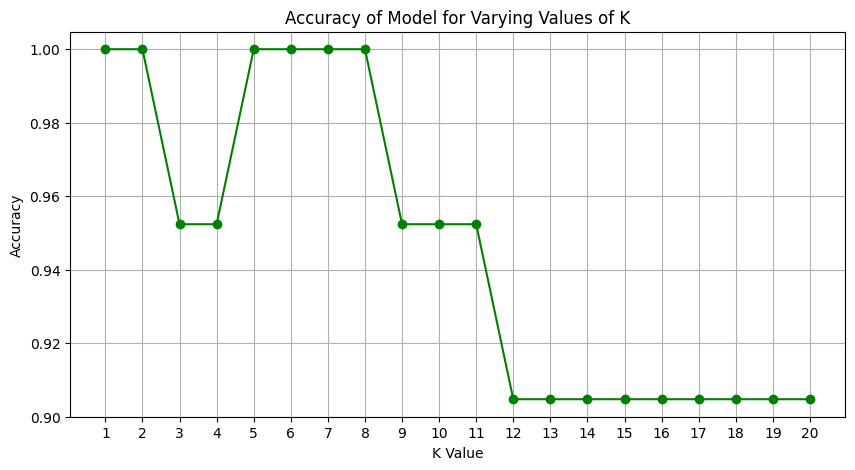

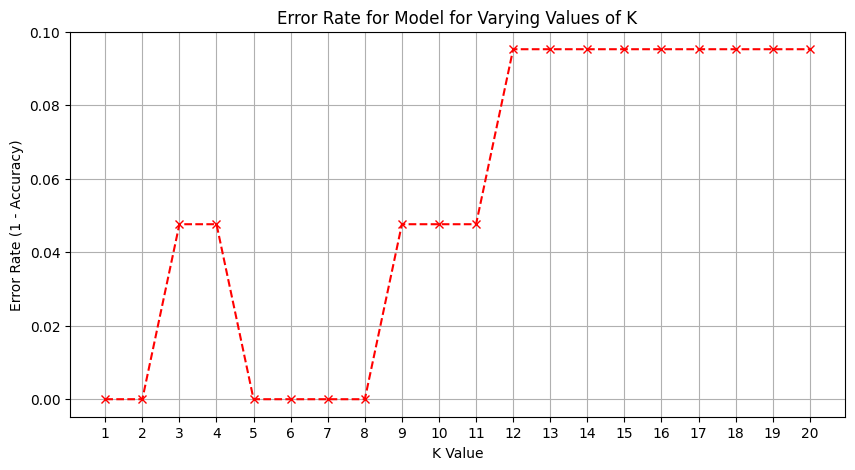

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Features and target
X = df.drop(columns=['type'])
y = df['type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Store accuracy and error for different k values
k_values = range(1, 21)
accuracies = []
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # Euclidean
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    errors.append(1 - acc)

# Plot Accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='green')
plt.title("Accuracy of Model for Varying Values of K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot Error Rate vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, errors, marker='x', linestyle='--', color='red')
plt.title("Error Rate for Model for Varying Values of K")
plt.xlabel("K Value")
plt.ylabel("Error Rate (1 - Accuracy)")
plt.xticks(k_values)
plt.grid(True)
plt.show()
